## Marianna Ohanyan 
## Bussiness Analytics hw2
## 20 February, 2019

### Assigment 
Use the Student_data.csv dataset to conduct a regression analysis and obtain a
model explaining the student final grade (final column of the dataset).
1. Choose all or several variables which you think can affect the student final
grade.
2. Estimate a linear regression model with OLS method to obtain the model
parameters.
3. Evaluate the overall model and say whether assumptions are met or not.
4. Extend the model (using transformation, selection or shrinkage methods) to
obtain a better model, if possible.
5. Select the model which performs better on the test set or passes
diagnostics best.
6. Interpret the results obtained from the final model.


In [290]:
import pandas as pd #to read and manipulate data
import matplotlib.pyplot as plt #to draw graphs
import numpy as np #to do scientific computing if any
import seaborn as sns #for heatmap
from statsmodels.formula.api import ols
from statsmodels.api import qqplot
from statsmodels.stats.outliers_influence import variance_inflation_factor #for checking Multicolinearity
from statsmodels.stats.diagnostic import linear_rainbow #linearity test
from scipy.stats import shapiro #for checking normality
from statsmodels.stats.diagnostic import het_breuschpagan #for Breusch-Pagan test test

In [177]:
data = pd.read_excel('Student_data.xlsx')
# droping the StudentId column as it is just enumeration
data.drop(["StudentID"], axis=1, inplace=True)
data.head()

,school2,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,Final_Grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,10


In [178]:
df.isnull().sum()

Final_Grade    0
school2        0
sex            0
age            0
guardian       0
studytime      0
schoolsup      0
activities     0
internet       0
absences       0
health         0
Dalc           0
Walc           0
goout          0
dtype: int64

###### 1.We dont have missing values, and as an assumption I will take all variables in the model to predict student final grade 


In [180]:
variables_all=data.columns.tolist()
variables_all.remove("Final_Grade") 
variables_all ="+".join(variables_all)
variables_all


'school2+sex+age+address+famsize+Pstatus+Medu+Fedu+Mjob+Fjob+reason+guardian+traveltime+studytime+failures+schoolsup+famsup+paid+activities+nursery+higher+internet+romantic+famrel+freetime+goout+Dalc+Walc+health+absences'

In [292]:
model=ols("Final_Grade~"+variables_all, data=data)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Final_Grade   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     3.463
Date:                Wed, 20 Feb 2019   Prob (F-statistic):           3.32e-10
Time:                        11:33:41   Log-Likelihood:                -1097.5
No. Observations:                 395   AIC:                             2275.
Df Residuals:                     355   BIC:                             2434.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               14.0777      4.481      3.142      0.002       5.265      22.890
school2[T.MS]            0.7256      0.792      0.917      0.360      -0.831       2.282
sex[T.M]                 1.2624      0.500      2.525      0.012       0.279       2.246
address[T.U]             0.5513      0.584      0.944      0.346      -0.597       1.700
famsize[T.LE3]           0.7028      0.488      1.439      0.151      -0.257       1.663
Pstatus[T.T]            -0.3201      0.724     -0.442      0.659      -1.744       1.104
Mjob[T.health]           0.9981      1.118      0.893      0.373      -1.201       3.197
Mjob[T.other]           -0.3590      0.713     -0.503      0.615      -1.762       1.044
Mjob[T.services]         0.6583      0.798      0.825      0.410      -0.911       2.227
Mjob[T.teacher]         -1.2415      1.038     -1.196      0.233      -3.283       0.800
Fjob[T.health]           0.3477      1.438      0.242      0.809      -2.480       3.176
Fjob[T.other]           -0.6197      1.023     -0.606      0.545      -2.632       1.392
Fjob[T.services]        -0.4658      1.057     -0.441      0.660      -2.544       1.613
Fjob[T.teacher]          1.3262      1.297      1.023      0.307      -1.224       3.876
reason[T.home]           0.0785      0.554      0.142      0.887      -1.011       1.168
reason[T.other]          0.7771      0.818      0.950      0.343      -0.831       2.385
reason[T.reputation]     0.6130      0.577      1.063      0.288      -0.521       1.747
guardian[T.mother]       0.0698      0.546      0.128      0.898      -1.003       1.143
guardian[T.other]        0.7501      0.999      0.751      0.453      -1.216       2.716
schoolsup[T.yes]        -1.3506      0.667     -2.025      0.044      -2.662      -0.039
famsup[T.yes]           -0.8618      0.479     -1.800      0.073      -1.803       0.080
paid[T.yes]              0.3397      0.478      0.711      0.477      -0.600       1.279
activities[T.yes]       -0.3295      0.445     -0.741      0.459      -1.205       0.546
nursery[T.yes]          -0.1773      0.549     -0.323      0.747      -1.258       0.903
higher[T.yes]            1.3705      1.078      1.272      0.204      -0.749       3.490
internet[T.yes]          0.4981      0.620      0.804      0.422      -0.720       1.717
romantic[T.yes]         -1.0945      0.469     -2.332      0.020      -2.017      -0.172
age                     -0.3752      0.217     -1.727      0.085      -0.802       0.052
Medu                     0.4569      0.323      1.414      0.158      -0.179       1.092
Fedu                    -0.1046      0.278     -0.377      0.707      -0.651       0.441
traveltime              -0.2403      0.339     -0.709      0.479      -0.907       0.426
studytime                0.5495      0.288      1.910    

### 2,3 Evaluation of linear model with all the parametrs

R-squared and F-statistics: As Prob (F-statistic) shows our model is statistically significant at 5% significance leve, so there is at least one estimated coefficient (besides intercept) that is not null. R-squared is quite small number and it shows that 27.6% of variance in Student Final Grade is explained by the variables included in the model.

Adj. R-squared: As summary shows it's 19.6% and it is not close to R-squared, which may signal about the existence of variables in the model, whose inclusion can be questioned.

Statistically significant variables: As p-values of t-statistics show, all variables included in the model are not statistically significant at 5% sig. level (p<=0.05), so we need to remove some of them.

### 4.Continuing with improving the model, future actions:
1) remove variables with hight correlation                                                    
2) remove outliers from data                                                 
3) step by step remove insignificant variables to close the gap between R squared and its R adjusted 

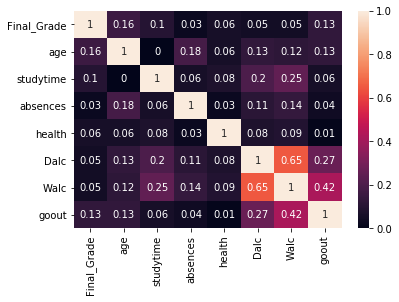

In [90]:
df.corr()
sns.heatmap(df.corr().abs().round(2), annot=True)
plt.show()

We can see that independence condition is not satisfied so it is better to remove the variable "Dalc" from the model as it has correlation with other variable

In [ ]:
data.describe()

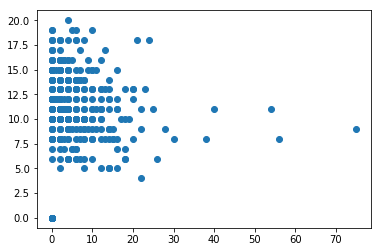

In [128]:
plt.scatter(data.absences,data.Final_Grade)
plt.show()

We can observe outliers in the model so I m going to remove outliers using IQR from the model to improve it

In [293]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

new_data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]


In [294]:
variables_new= new_data.columns.tolist()
variables_new.remove("Dalc")
variables_new.remove("Final_Grade")
variables_new ="+".join(variables_new)
variables_new

'school2+sex+age+address+famsize+Pstatus+Medu+Fedu+Mjob+Fjob+reason+guardian+traveltime+studytime+failures+schoolsup+famsup+paid+activities+nursery+higher+internet+romantic+famrel+freetime+goout+Walc+health+absences'

In [307]:
variables_new = "sex+age+Pstatus+Fedu+studytime+schoolsup+famsup+romantic"

In [308]:
model2=ols("Final_Grade~"+variables_new, data=new_data)
results=model2.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Final_Grade   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     6.485
Date:                Wed, 20 Feb 2019   Prob (F-statistic):           1.30e-07
Time:                        12:27:27   Log-Likelihood:                -646.99
No. Observations:                 239   AIC:                             1312.
Df Residuals:                     230   BIC:                             1343.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           21.9390      4.117      5.329      0.000      13.827      30.051
sex[T.M]             1.4900      0.514      2.896      0.004       0.476       2.504
Pstatus[T.T]        -1.9042      0.841     -2.264      0.025      -3.562      -0.247
schoolsup[T.yes]    -2.0945      0.775     -2.702      0.007      -3.622      -0.567
famsup[T.yes]       -1.0500      0.518     -2.028      0.044      -2.070      -0.030
romantic[T.yes]     -1.3306      0.538     -2.475      0.014      -2.390      -0.271
age                 -0.6879      0.231     -2.976      0.003      -1.143      -0.232
Fedu                 0.5640      0.233      2.424      0.016       0.106       1.022
studytime            0.8296      0.371      2.238      0.026       0.099       1.560
==============================================================================
Omnibus:                       40.264   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.774
Skew:                          -0.936   Prob(JB):                     5.22e-15
Kurtosis:                       4.761   Cond. No.                         293.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 5.Model diagnostics

### Cecking for Linearity and Equal variance

In [302]:
#residuals of the model
residuals=results.resid
pred_values=results.predict()

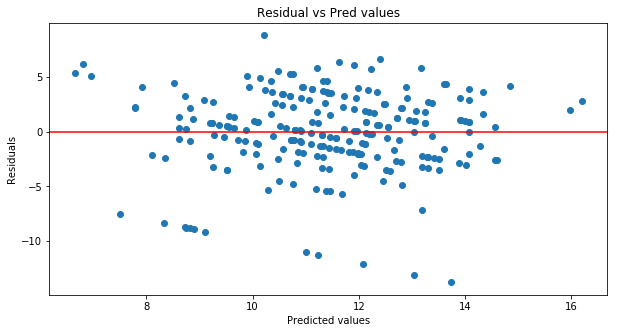

In [303]:
#residuals of the model
#lets plot predicted values vs residuals
plt.figure(figsize=(10,5))
plt.scatter(pred_values,residuals)
plt.axhline(y=0, c="red")
plt.title("Residual vs Pred values")
plt.ylabel("Residuals")
plt.xlabel("Predicted values")
plt.show()

In [301]:
linear_rainbow(results)

(0.6785438376799339, 0.9810048950648438)

As p value is big enough we can not reject the linearity of the model so we assume that it is linear so the "L" is satisfied

In [291]:
#Breusch-Pagan test for homoscedasticity
#The null hypothesis assumes homoskedasticity
#p-value<=0.05 shows that there is violation of homoscedasticity
het_breuschpagan(residuals,model2.exog)

(6.623803793016468,
 0.4690705727882366,
 0.9406536845746626,
 0.47582221835868166)

we can see that homoskedasticity is not violated so "E" of line is satisfied 

### Normality

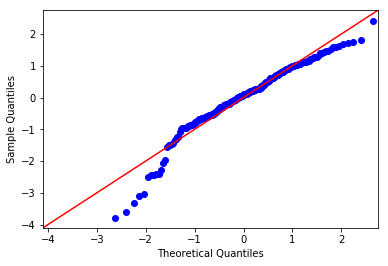

In [304]:
#QQ plot
qqplot(residuals,fit=True, line='45')
plt.show()

Residuals look far from normal which means we are in trouble. In particular, if the residual tend to be larger in magnitude than what we would expect from the normal distribution, then our p-values and confidence intervals may be too optimisitic. i.e., we may fail to adequately account for the full variability of the data. "N" is not satisfied

In [276]:
df1.head()

,sex,age,Fedu,studytime,schoolsup,famsup,romantic
0,F,18,4,2,yes,no,no
1,F,17,1,2,no,yes,no
3,F,15,2,3,no,yes,yes
4,F,16,3,2,no,yes,no
5,M,16,3,2,no,yes,no


In [284]:
new_data['schoolsup'] = (new_data['schoolsup'] == 'yes').apply(int)
new_data['famsup'] = (new_data['famsup'] == 'yes').apply(int)
new_data['romantic'] = (new_data['romantic'] == 'yes').apply(int)
new_data['sex'] = (new_data['sex'] == 'M').apply(int)


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [288]:
df1 = new_data[["sex", "age", "Fedu", "studytime","schoolsup","famsup","romantic"]]

In [287]:
#let's create a list from the independent variables included in new_data model2
my_list=["sex", "age", "Fedu", "studytime","schoolsup","famsup","romantic"]
#calculating vif using variance_inflation_factor() function from statsmodel
vif = [variance_inflation_factor(df1[my_list].values, i) for i in range(0,7)]
print(vif) 

[2.0848473251162605, 17.491735236529077, 7.416465313099297, 10.330361421821067, 1.1526423331841635, 2.8483949526314203, 1.473560032324029]


We can see that vif(age)>10 which means we have multicolinearity in our model , "I" is not satisfied

#### Evaluation and interpretation of linear model with (sex,age,Pstatus,Fedu,studytime,schoolsup,famsup,romantic) parametrs
Our model is not a very good one , as we can see 
R-squared and F-statistics: As Prob (F-statistic) shows our model is statistically significant at 5% significance level, R-squared is quite small number and it shows that 18.4% of variance in Student Final Grade is explained by the variables included in the model. However in this model 

Adj. R-squared is 15.6% which is close R-squared, which means that almost all variables included in the model have statistically significant relationship with Student Final grade.

Statistically significant variables:  As p-values of t-statistics show, all variables included in the model are statistically significant at 5% sig. level (p<=0.05).

Coefficients: if gender is Male , we have increase in final grade , however we can not know the exact increase as it is not the only dependant variable , if it was the only one ideally we will have increase (1,49 times) same goes with another cases, Fedu(fathers eduaction), More Studytime influesnce model positively. Whereas Pstatus T ,
schoolsup, famsup, romantic, age influences negatively	

Moreover "LINE" is not satisfied , as Independance and Normality are violated -> model is not a good one, we can not predict accurately the final grade of student depending on the factors and that presented in this data set